In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CATEGORICAL_MAPPING = {
    'sex': {
        0: 'F',
        1: 'M'
    },
    'cp': {
        1: 'typical angina',
        2: 'atypical angina',
        3: 'non-anginal pain',
        4: 'asymptomatic'
    },
    'thal': {
        3: 'normal',
        6: 'fixed defect',
        7: 'reversable defect'
    },
    'fbs': {
        0: '<= 120mg/dl',
        1: '> 120mg/dl'
    },
    'exang': {
        0: 'no',
        1: 'yes'
    },
    'slope': {
        1: 'up',
        2: 'flat',
        3: 'down'
    },
    'restecg': {
        0: 'normal',
        1: 'ST-T wave abnormality',
        2: 'left ventricular hypertrophy'
    }
}

def clean_dataframe(df, include_target=True):
    with pd.option_context('mode.chained_assignment', None):
        df = df.replace('?', np.nan)
        df = df.dropna()

        df['ca'] = pd.to_numeric(df['ca']).astype(int)
        df['chol'] = pd.to_numeric(df['chol']).astype(int)
        df['age'] = pd.to_numeric(df['age']).astype(int)
        df['thalach'] = pd.to_numeric(df['thalach']).astype(int)
        df['trestbps'] = pd.to_numeric(df['trestbps']).astype(int)
        df['oldpeak'] = pd.to_numeric(df['oldpeak']).astype(float)
        df['thal'] = pd.to_numeric(df['thal']).astype(int)

        for cat, mapping in CATEGORICAL_MAPPING.items():
            for key, text in mapping.items():
                df[cat][df[cat] == key] = text
            df[cat].astype(object)

        if include_target:
            df['target'] = df['target'].replace([2,3,4],1)
            df['target'] = df['target'].astype(int)

    return df


In [3]:
df = pd.read_csv('backend/resources/processed.cleveland.data')
df = clean_dataframe(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null object
cp          297 non-null object
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null object
restecg     297 non-null object
thalach     297 non-null int64
exang       297 non-null object
oldpeak     297 non-null float64
slope       297 non-null object
ca          297 non-null int64
thal        297 non-null object
target      297 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 34.8+ KB


In [5]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,typical angina,145,233,> 120mg/dl,left ventricular hypertrophy,150,no,2.3,down,0,fixed defect,0
1,67,M,asymptomatic,160,286,<= 120mg/dl,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,1
2,67,M,asymptomatic,120,229,<= 120mg/dl,left ventricular hypertrophy,129,yes,2.6,flat,2,reversable defect,1
3,37,M,non-anginal pain,130,250,<= 120mg/dl,normal,187,no,3.5,down,0,normal,0
4,41,F,atypical angina,130,204,<= 120mg/dl,left ventricular hypertrophy,172,no,1.4,up,0,normal,0
5,56,M,atypical angina,120,236,<= 120mg/dl,normal,178,no,0.8,up,0,normal,0
6,62,F,asymptomatic,140,268,<= 120mg/dl,left ventricular hypertrophy,160,no,3.6,down,2,normal,1
7,57,F,asymptomatic,120,354,<= 120mg/dl,normal,163,yes,0.6,up,0,normal,0
8,63,M,asymptomatic,130,254,<= 120mg/dl,left ventricular hypertrophy,147,no,1.4,flat,1,reversable defect,1
9,53,M,asymptomatic,140,203,> 120mg/dl,left ventricular hypertrophy,155,yes,3.1,down,0,reversable defect,1


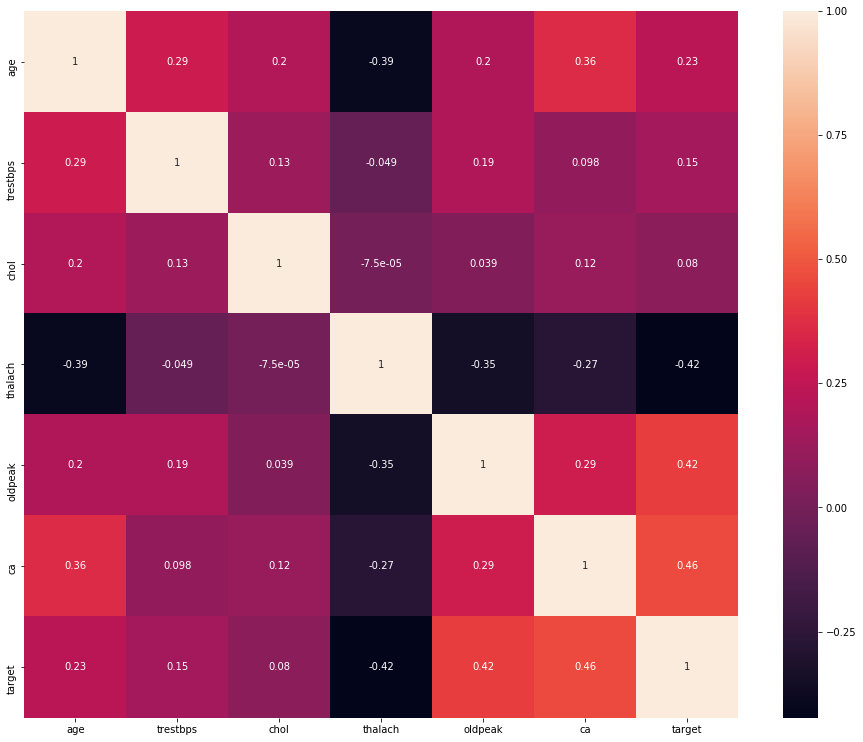

In [6]:
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(),annot=True)

In [7]:
# RFC
# https://stackoverflow.com/questions/20463281/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #for the model

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

# Split categorical data
df = pd.get_dummies(df)

# Split Training & Test Set 80-20
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10)

In [8]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(max_depth=4,n_estimators=100)
#print("Training Cross Val Score: {}".format(cross_val_score(rf, X_train, y_train, cv=10)))
rf.fit(X_train, y_train)

# http://jmlr.csail.mit.edu/papers/v11/cawley10a.html
#print("Training Cross Val Score: {}".format(cross_val_score(rf, X_train, y_train, cv=10)))
#print("Test Cross Val Score: {}".format(cross_val_score(rf, X_test, y_test, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
# Insight on Features

In [10]:
# https://www.kaggle.com/dansbecker/permutation-importance
# Finding out which features influence target

perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = list(X_test.columns), top=40)

Weight,Feature
0.0467 ± 0.0249,cp_asymptomatic
0.0367 ± 0.0249,thal_normal
0.0267 ± 0.0340,oldpeak
0.0200 ± 0.0133,exang_yes
0.0100 ± 0.0163,slope_flat
0.0100 ± 0.0452,ca
0.0067 ± 0.0163,thal_reversable defect
0.0067 ± 0.0163,thal_fixed defect
0.0067 ± 0.0163,slope_up
0.0067 ± 0.0163,trestbps


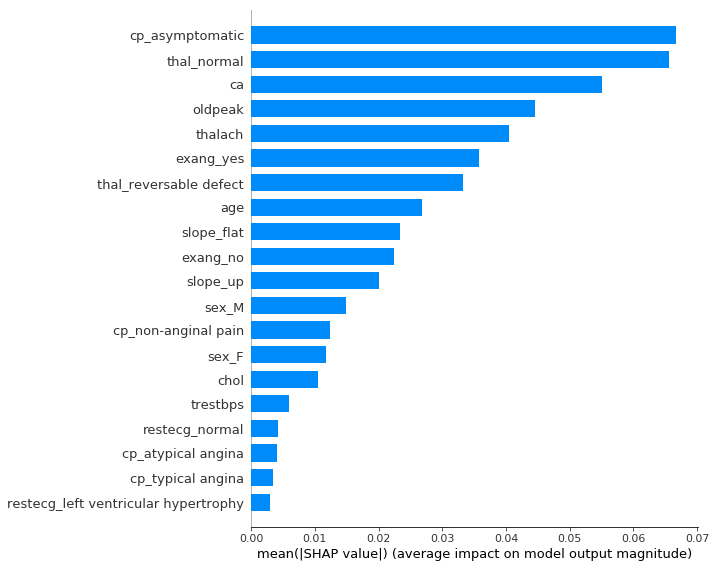

In [11]:
# https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values
# CHecking the magnitude for how much each feature influences the model
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [12]:
# Same resource used as above
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

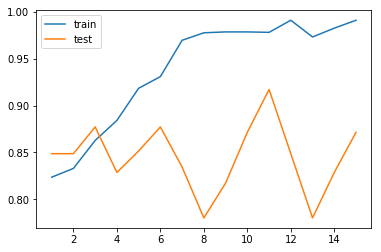

In [13]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
# https://arxiv.org/abs/1705.05654

# Why max_depth = 4 is best
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   x_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, x_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, label='train')
line2, = plt.plot(max_depths, test_results, label='test')
plt.legend(loc='upper left')
plt.show()

In [14]:
print("Train: {}".format(accuracy_score(y_train, x_pred)))
print("Test: {}".format(accuracy_score(y_test, y_pred)))

Train: 0.9915611814345991
Test: 0.8833333333333333


In [15]:
mean_squared_error(y_test,y_pred)

0.11666666666666667

In [16]:
c = confusion_matrix(y_test,y_pred)
print(c)

[[33  2]
 [ 5 20]]


In [17]:
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)